In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)


In [12]:
data_path = "../data/raw/telco_churn.csv"
df = pd.read_csv(data_path)

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
df.shape


(7043, 21)

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
df["Churn"].value_counts()


Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [16]:
df["Churn"].value_counts(normalize=True) * 100


Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

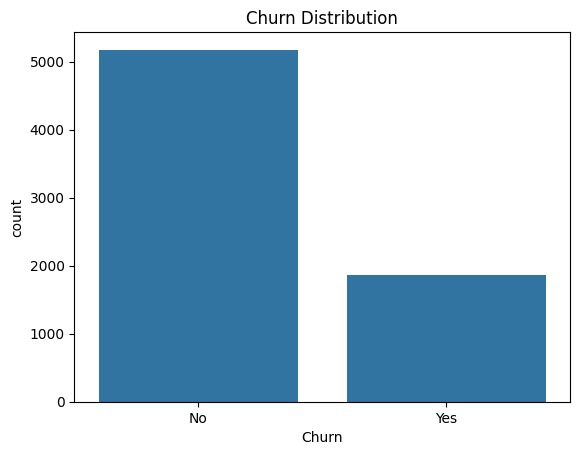

In [17]:
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()


In [18]:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


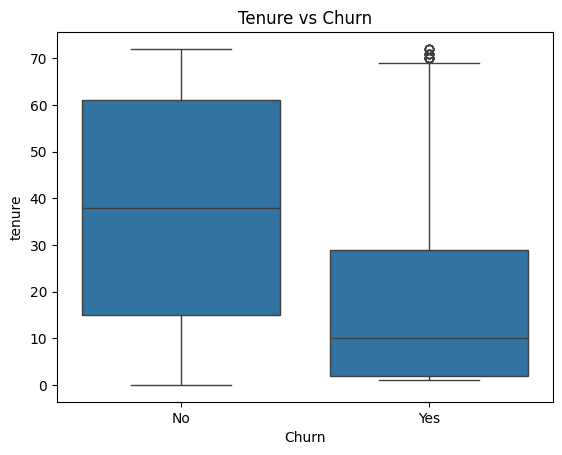

In [19]:
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure vs Churn")
plt.show()


In [20]:
contract_churn = (
    df.groupby("Contract")["Churn"]
      .value_counts(normalize=True)
      .rename("percentage")
      .reset_index()
)

contract_churn


,Contract,Churn,percentage
0,Month-to-month,No,0.572903
1,Month-to-month,Yes,0.427097
2,One year,No,0.887305
3,One year,Yes,0.112695
4,Two year,No,0.971681
5,Two year,Yes,0.028319


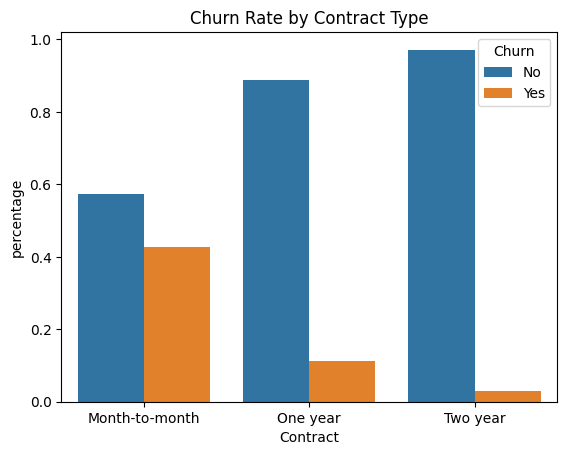

In [21]:
sns.barplot(
    x="Contract",
    y="percentage",
    hue="Churn",
    data=contract_churn
)
plt.title("Churn Rate by Contract Type")
plt.show()


In [22]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [23]:
df["TotalCharges"].unique()[:10]


array(['29.85', '1889.5', '108.15', '1840.75', '151.65', '820.5',
       '1949.4', '301.9', '3046.05', '3487.95'], dtype=object)

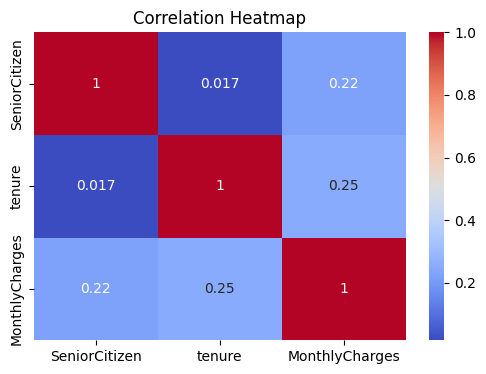

In [24]:
numeric_cols = df.select_dtypes(include=["int64", "float64"])
corr = numeric_cols.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


##  EDA Key Findings

- **Class imbalance exists**  
  Around **26–27% of customers have churned**, while the majority (**~73–74%**) have stayed.  
  This indicates an **imbalanced classification problem**.

- **Tenure strongly impacts churn**  
  Customers with **short tenure** are far more likely to churn, whereas **long-tenure customers** tend to stay with the company.

- **Month-to-month contracts churn more**  
  Customers on **month-to-month contracts** show the **highest churn rate**, while **1-year and 2-year contracts** have significantly lower churn.

- **Some numeric columns need type fixing**  
  The `TotalCharges` column is stored as an **object/string** due to blank values and must be **cleaned and converted to numeric** before modeling.

- **Categorical features dominate the dataset**  
  Most features are **categorical**, so an appropriate **encoding strategy** (Label Encoding or One-Hot Encoding) is required before model training.
